In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import tqdm

In [2]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
articles_meta = pd.read_csv("data/cnn_articles_meta.csv")

In [4]:
keywords = ["covid", "coronavirus", "pandemic"]

In [5]:
covid_articles_meta = articles_meta[articles_meta.title.str.contains("|".join(keywords))]
covid_articles_meta

,title,date,url
5,'This is a time to come together': Pence defen...,2020-03-01,https://www.cnn.com/2020/03/01/politics/mike-p...
7,Paris' famed Louvre Museum is closed as France...,2020-03-01,https://www.cnn.com/2020/03/01/europe/france-c...
14,Biden slams Trump administration's response to...,2020-03-01,https://www.cnn.com/2020/03/01/politics/joe-bi...
17,Trump is expected to visit the CDC and NIH thi...,2020-03-01,https://www.cnn.com/2020/03/01/politics/donald...
19,'SNL' spoofs Mike Pence's new role leading cor...,2020-03-01,https://www.cnn.com/2020/03/01/media/snl-mike-...
...,...,...,...
33654,"Dow 30,000: How the market rally defied a pand...",2020-11-25,https://www.cnn.com/2020/11/25/investing/prema...
33655,Fauci says he's worried about what coronavirus...,2020-11-25,https://www.cnn.com/2020/11/25/health/us-coron...
33661,What you need to know about coronavirus on Wed...,2020-11-25,https://www.cnn.com/2020/11/25/world/coronavir...
33668,50 ways to celebrate a birthday during a pandemic,2020-11-25,https://www.cnn.com/2020/11/25/health/how-to-c...


In [6]:
n = 100

In [7]:
articles = []
for i, row in tqdm.tqdm(covid_articles_meta[:n].iterrows(), total=n):
    url = row.url
    
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    
    links = [a["href"] for a in soup.select(".zn-body__paragraph a")]

    content = soup.find_all(class_="zn-body__paragraph")
    article_text = " ".join([c.text for c in content])
    
    article = {
        "title": row.title,
        "date": row.date,
        "url": row.url,
        "links": links,
        "text": article_text,
    }
    articles.append(article)

100%|██████████| 100/100 [00:39<00:00,  2.56it/s]


In [8]:
all_links = [a["links"] for a in articles]
all_links = [a for b in all_links for a in b]
all_links

['https://www.cnn.com/videos/politics/2020/03/01/mike-pence-coronavirus-don-jr-fox-news-jake-tapper-sotu-vpx.cnn',
 'https://www.cnn.com/2020/03/01/politics/joe-biden-coronavirus-response-trump-administration-cnntv/index.html',
 'https://www.cnn.com/2020/02/28/politics/donald-trump-jr-coronavirus-democrats/index.html',
 'https://www.cnn.com/2020/02/26/politics/trump-coronavirus-stock-market/index.html',
 'https://twitter.com/tedlieu/status/1234152146611818497?s=20',
 'https://www.cnn.com/asia/live-news/coronavirus-outbreak-02-29-20-intl-hnk/h_b2418af32092b854e3591e11e08f2896',
 'https://www.cnn.com/travel/article/private-tour-louvre-paris/index.html',
 'https://www.who.int/emergencies/diseases/novel-coronavirus-2019/advice-for-public',
 'https://www.cnn.com/style/article/whats-so-special-about-the-mona-lisa/index.html',
 'https://www.cnn.com/travel/article/private-tour-louvre-paris/index.html',
 'https://www.cnn.com/asia/live-news/coronavirus-outbreak-03-01-20-intl-hnk/h_fab395d1124a91

In [9]:
outside_links = [l for l in all_links if "cnn.com" not in l]
outside_links

['https://twitter.com/tedlieu/status/1234152146611818497?s=20',
 'https://www.who.int/emergencies/diseases/novel-coronavirus-2019/advice-for-public',
 'https://www.politico.com/playbook',
 'https://twitter.com/realDonaldTrump/status/1234109126864707585',
 'https://bit.ly/38cNrIA',
 'https://www.epa.gov/no2-pollution/basic-information-about-no2#What%20is%20NO2',
 'https://earthobservatory.nasa.gov/images/146362/airborne-nitrogen-dioxide-plummets-over-china',
 'https://www.youtube.com/watch?v=ZKTn4u2ZWv4',
 'https://www.jpost.com/Israel-News/Politics-And-Diplomacy/A-beginners-guide-to-Israels-third-election-in-the-past-12-months-618833',
 'https://www.washingtonpost.com/news/powerpost/paloma/daily-202/2020/01/06/daily-202-key-dates-to-put-on-your-calendar-for-2020/5e12bfa388e0fa32a5147969/',
 'https://www.capitalgazette.com/news/crime/ac-cn-trial-date-20191107-mrhxgzpznbb6dnv2yftwxc64hu-story.html',
 'https://www.bloomberg.com/news/articles/2020-02-19/opec-sends-official-invites-for-marc

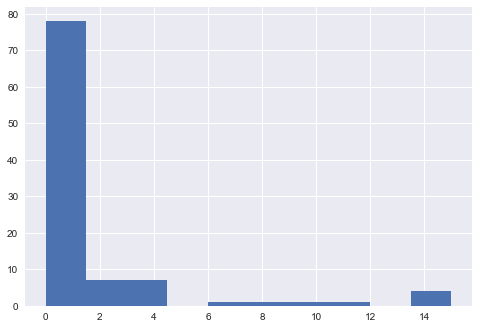

In [10]:
cdc_counts = [a["text"].count("CDC") for a in articles]
plt.hist(cdc_counts)
plt.show()

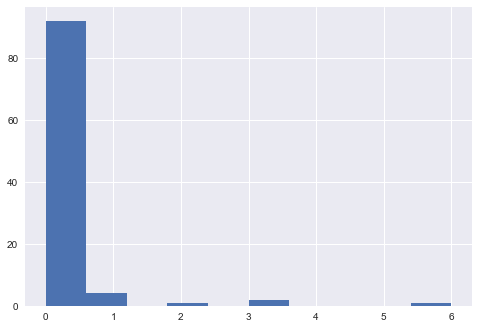

In [11]:
who_counts = [a["text"].count("WHO") for a in articles]
plt.hist(who_counts)
plt.show()

In [12]:
articles_df = pd.DataFrame(articles)
articles_df.to_csv("data/cnn_covid_articles_content.csv", index=False)